<a href="https://colab.research.google.com/github/Alexcei/Neural_Networks_Pytorch/blob/master/pythorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import torch

**Умножение матриц**

mm / matmul / @ - векторное произведение (состоит из всех скалярных произведений векторов строк а на вектора столбцы b)

dot / * - скалярное

In [47]:
x = torch.tensor([[1,2,3],[4,5,6]])
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [48]:
y = torch.tensor([[1,2],[3,4],[5,6]])
y

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [50]:
x @ y

tensor([[22, 28],
        [49, 64]])

In [51]:
x[0,:]

tensor([1, 2, 3])

In [52]:
y[:,0]

tensor([1, 3, 5])

In [54]:
print(sum(x[0,:] * y[:,0]))
print(torch.dot(x[0,:], y[:,0]))

tensor(22)
tensor(22)


In [62]:
mat = torch.tensor([range(1,7)])
mat

tensor([[1, 2, 3, 4, 5, 6]])

In [63]:
a = mat.reshape(2,3)
a

tensor([[1, 2, 3],
        [4, 5, 6]])

In [64]:
b = mat.reshape(3,2)
b

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [65]:
torch.mm(a,b)

tensor([[22, 28],
        [49, 64]])

In [66]:
torch.matmul(a,b)

tensor([[22, 28],
        [49, 64]])

In [67]:
torch.dot(torch.tensor([2, 1]), torch.tensor([2, 3]))

tensor(7)

In [68]:
a @ b

tensor([[22, 28],
        [49, 64]])

  Умножение матриц состоит из всех скалярных произведений векторов строк а на вектора столбцы b

In [69]:
a[0,:], b[:,0]

(tensor([1, 2, 3]), tensor([1, 3, 5]))

In [70]:
sum(a[0,:] * b[:,0])

tensor(22)

**Создадим однослойную нейронную сеть**

In [145]:
x = torch.randn([1, 100, 3])
target = torch.randn([1, 100, 64])

In [146]:
x.shape, target.shape

(torch.Size([1, 100, 3]), torch.Size([1, 100, 64]))

In [147]:
class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = torch.nn.Linear(3, 64)

  def forward(self, x):
    x = self.fc1(x)
    return x

In [148]:
model = Net()

In [149]:
par = list(model.parameters())

In [150]:
ww = x @ par[0].T + par[1] # model(x) прямой проход
ww.shape

torch.Size([1, 100, 64])

In [151]:
par[0].shape, x.T.shape

(torch.Size([64, 3]), torch.Size([3, 100, 1]))

In [152]:
model(x)

tensor([[[-0.9430, -0.9716, -0.4352,  ...,  0.9699, -0.9679,  1.2930],
         [-0.6834, -0.6482, -0.1890,  ...,  0.7622, -0.4183,  0.6930],
         [-0.0828,  0.4976, -0.3568,  ...,  0.2807,  0.6303, -0.4081],
         ...,
         [ 0.0514, -0.1338,  0.2877,  ...,  1.9346,  0.1958,  0.4468],
         [-0.6029, -0.5556, -0.3240,  ...,  1.1099, -0.5167,  0.9093],
         [-0.9470, -1.3585,  0.5529,  ...,  0.4544, -0.4180,  0.5125]]],
       grad_fn=<AddBackward0>)

In [153]:
criterion = torch.nn.MSELoss()
output = model(x)
loss = criterion(output, target)
loss

tensor(1.4949, grad_fn=<MseLossBackward>)

In [156]:
torch.sum((output - target)**2)/6400

tensor(1.4949, grad_fn=<DivBackward0>)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(),  lr=0.03)

In [ ]:
for epoch in range(10):
  output = model(x)
  loss = criterion(output, target)
  print('Epoch: ', epoch, 'Loss: ', loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:  0 Loss:  1.5152755975723267
Epoch:  1 Loss:  1.514113426208496
Epoch:  2 Loss:  1.5129541158676147
Epoch:  3 Loss:  1.5117974281311035
Epoch:  4 Loss:  1.5106433629989624
Epoch:  5 Loss:  1.5094915628433228
Epoch:  6 Loss:  1.5083427429199219
Epoch:  7 Loss:  1.5071961879730225
Epoch:  8 Loss:  1.5060522556304932
Epoch:  9 Loss:  1.504910945892334


In [ ]:
list(model.parameters()) # это список двух параметров w, bias

In [ ]:
model(x) # это forward мы получили предсказания, они плохие т.к. сеть еще не сошлась

tensor([[[-0.4475,  0.2821,  0.3167,  ..., -0.0312,  0.2750, -0.5030],
         [ 0.3059,  1.3729,  0.8983,  ...,  0.8884, -0.1003,  0.4988],
         [ 0.7310,  1.2137,  1.3243,  ...,  0.0080,  2.3862, -2.4441],
         ...,
         [-0.0333,  0.9335,  0.6572,  ...,  0.4565,  0.2081, -0.0494],
         [-0.1330,  0.6950,  0.6753,  ..., -0.1748,  1.5607, -1.6192],
         [-0.5618,  0.8730,  0.5063,  ..., -0.3278,  2.0722, -1.7654]]],
       grad_fn=<AddBackward0>)

In [ ]:
# pip install torchviz
import torchviz

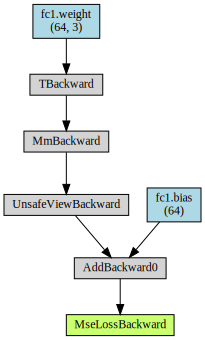

In [ ]:
torchviz.make_dot(loss, dict(model.named_parameters()))

***Создадим еще одну однослойную нейронную сеть и распишем каждый ее шаг***

In [157]:
x = torch.tensor([[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]])
target = torch.tensor([[1.0, 2.0, 3.0]])

In [158]:
x.shape, target.shape

(torch.Size([1, 7]), torch.Size([1, 3]))

In [159]:
class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = torch.nn.Linear(7, 3)

  def forward(self, x):
    x = self.fc1(x)
    return x

In [160]:
model = Net()

In [161]:
output = model(x)

In [162]:
param = list(model.parameters())
param

[Parameter containing:
 tensor([[-0.1684, -0.2188, -0.1311, -0.0431, -0.0636,  0.1645,  0.0357],
         [-0.3476, -0.1975,  0.1432, -0.1315, -0.0916, -0.1523, -0.1469],
         [-0.0825, -0.2417,  0.0855,  0.1478,  0.2488,  0.0083,  0.1357]],
        requires_grad=True), Parameter containing:
 tensor([-0.2944,  0.1551,  0.0950], requires_grad=True)]

In [163]:
x.shape, param[0].T.shape, param[1].shape

(torch.Size([1, 7]), torch.Size([7, 3]), torch.Size([3]))

In [164]:
x @ param[0].T + param[1] # это эквивалент прямого прохода (forward) model(x)

tensor([[-0.5475, -3.0837,  2.6204]], grad_fn=<AddBackward0>)

In [165]:
criterion = torch.nn.MSELoss()

In [166]:
optimizer = torch.optim.SGD(model.parameters(),  lr=0.0003)

In [167]:
loss = criterion(output, target)
loss

tensor(9.4609, grad_fn=<MseLossBackward>)

In [168]:
output, target

(tensor([[-0.5475, -3.0837,  2.6204]], grad_fn=<AddmmBackward>),
 tensor([[1., 2., 3.]]))

In [169]:
torch.sum((output - target)**2) / 3 # это эквивалент ф-и ошибки (MSELoss)

tensor(9.4609, grad_fn=<DivBackward0>)

In [170]:
loss.backward()

In [171]:
list(model.parameters())[0].grad

tensor([[ -1.0317,  -2.0634,  -3.0950,  -4.1267,  -5.1584,  -6.1901,  -7.2217],
        [ -3.3891,  -6.7782, -10.1673, -13.5564, -16.9455, -20.3347, -23.7238],
        [ -0.2531,  -0.5062,  -0.7592,  -1.0123,  -1.2654,  -1.5185,  -1.7716]])

In [172]:
list(model.parameters())[1].grad

tensor([-1.0317, -3.3891, -0.2531])

In [173]:
optimizer.zero_grad() # обнуляем градиент перед след шагом (здесь мы обнулии рано поэтому сделаем еще один прямой проход)

In [174]:
list(model.parameters())[0].grad

tensor([[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]])

In [175]:
list(model.parameters())[1].grad

tensor([0., 0., 0.])

**итак**

In [176]:
output = model(x)

In [177]:
loss = criterion(output, target)

In [178]:
optimizer.zero_grad()

In [179]:
loss.backward()

**backward (часные производные w, b сложной ф-и по правилу цепи)**

In [180]:
param[0].grad # grad w

tensor([[ -1.0317,  -2.0634,  -3.0950,  -4.1267,  -5.1584,  -6.1901,  -7.2217],
        [ -3.3891,  -6.7782, -10.1673, -13.5564, -16.9455, -20.3347, -23.7238],
        [ -0.2531,  -0.5062,  -0.7592,  -1.0123,  -1.2654,  -1.5185,  -1.7716]])

In [181]:
grad = 2 * (output - target) / 3
grad

tensor([[-1.0317, -3.3891, -0.2531]], grad_fn=<DivBackward0>)

In [182]:
grad.T @ x # grad w

tensor([[ -1.0317,  -2.0634,  -3.0950,  -4.1267,  -5.1584,  -6.1901,  -7.2217],
        [ -3.3891,  -6.7782, -10.1673, -13.5564, -16.9455, -20.3347, -23.7238],
        [ -0.2531,  -0.5062,  -0.7592,  -1.0123,  -1.2654,  -1.5185,  -1.7716]],
       grad_fn=<MmBackward>)

In [183]:
param[1].grad # grad bias

tensor([-1.0317, -3.3891, -0.2531])

In [184]:
grad.sum(0) # grad bias

tensor([-1.0317, -3.3891, -0.2531], grad_fn=<SumBackward1>)

**оптимизатор**


In [185]:
class SGD(torch.optim.Optimizer):
    r"""Implements stochastic gradient descent (optionally with momentum).

    Nesterov momentum is based on the formula from
    `On the importance of initialization and momentum in deep learning`__.

    Args:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float): learning rate
        momentum (float, optional): momentum factor (default: 0)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        dampening (float, optional): dampening for momentum (default: 0)
        nesterov (bool, optional): enables Nesterov momentum (default: False)

    Example:
        >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
        >>> optimizer.zero_grad()
        >>> loss_fn(model(input), target).backward()
        >>> optimizer.step()

    __ http://www.cs.toronto.edu/%7Ehinton/absps/momentum.pdf

    .. note::
        The implementation of SGD with Momentum/Nesterov subtly differs from
        Sutskever et. al. and implementations in some other frameworks.

        Considering the specific case of Momentum, the update can be written as

        .. math::
            \begin{aligned}
                v_{t+1} & = \mu * v_{t} + g_{t+1}, \\
                p_{t+1} & = p_{t} - \text{lr} * v_{t+1},
            \end{aligned}

        where :math:`p`, :math:`g`, :math:`v` and :math:`\mu` denote the 
        parameters, gradient, velocity, and momentum respectively.

        This is in contrast to Sutskever et. al. and
        other frameworks which employ an update of the form

        .. math::
            \begin{aligned}
                v_{t+1} & = \mu * v_{t} + \text{lr} * g_{t+1}, \\
                p_{t+1} & = p_{t} - v_{t+1}.
            \end{aligned}

        The Nesterov version is analogously modified.
    """

    def __init__(self, params, lr=0.003, momentum=0, dampening=0,
                 weight_decay=0, nesterov=False):
        if lr < 0.0:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if momentum < 0.0:
            raise ValueError("Invalid momentum value: {}".format(momentum))
        if weight_decay < 0.0:
            raise ValueError("Invalid weight_decay value: {}".format(weight_decay))

        defaults = dict(lr=lr, momentum=momentum, dampening=dampening,
                        weight_decay=weight_decay, nesterov=nesterov)
        if nesterov and (momentum <= 0 or dampening != 0):
            raise ValueError("Nesterov momentum requires a momentum and zero dampening")
        super(SGD, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(SGD, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('nesterov', False)

    @torch.no_grad()
    def step(self, closure=None):
        """Performs a single optimization step.

        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            weight_decay = group['weight_decay']
            momentum = group['momentum']
            dampening = group['dampening']
            nesterov = group['nesterov']

            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad
                if weight_decay != 0:
                    d_p = d_p.add(p, alpha=weight_decay)
                if momentum != 0:
                    param_state = self.state[p]
                    if 'momentum_buffer' not in param_state:
                        buf = param_state['momentum_buffer'] = torch.clone(d_p).detach()
                    else:
                        buf = param_state['momentum_buffer']
                        buf.mul_(momentum).add_(d_p, alpha=1 - dampening)
                    if nesterov:
                        d_p = d_p.add(buf, alpha=momentum)
                    else:
                        d_p = buf

                p.add_(d_p, alpha=-group['lr'])

        return loss

In [186]:
optimizer = SGD(model.parameters(),  lr=0.0003)

In [187]:
for epoch in range(10):
  output = model(x)
  loss = criterion(output, target)
  print('Epoch: ', epoch, 'Loss: ', loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:  0 Loss:  9.46085262298584
Epoch:  1 Loss:  8.934782981872559
Epoch:  2 Loss:  8.437968254089355
Epoch:  3 Loss:  7.968776702880859
Epoch:  4 Loss:  7.5256733894348145
Epoch:  5 Loss:  7.107210159301758
Epoch:  6 Loss:  6.712016582489014
Epoch:  7 Loss:  6.338795185089111
Epoch:  8 Loss:  5.986328125
Epoch:  9 Loss:  5.6534600257873535
